In [1]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [11]:
customers = pd.read_csv(r'C:\Users\Siddhika\Downloads\Customers.csv')

In [13]:
products = pd.read_csv(r'C:\Users\Siddhika\Downloads\Products.csv')

In [15]:
transactions = pd.read_csv(r'C:\Users\Siddhika\Downloads\Transactions.csv')

In [17]:
print("Customers Data:")

Customers Data:


In [19]:
print(customers.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [21]:
print("\nProducts Data:")


Products Data:


In [23]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [25]:
print("\nTransactions Data:")


Transactions Data:


In [27]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [29]:
def check_missing_values(df, name):
    print(f"\n{name} Missing Values:")
    print(df.isnull().sum())

In [31]:
check_missing_values(customers, "Customers")
check_missing_values(products, "Products")
check_missing_values(transactions, "Transactions")


Customers Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [33]:
print("\nNumber of unique customers:", customers['CustomerID'].nunique())


Number of unique customers: 200


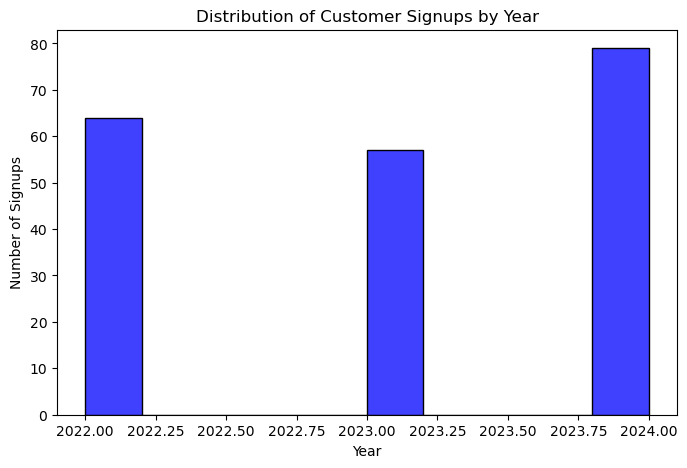

In [35]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
plt.figure(figsize=(8, 5))
sns.histplot(customers['SignupDate'].dt.year, bins=10, kde=False, color='blue')
plt.title("Distribution of Customer Signups by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

In [37]:
print("\nNumber of unique products:", products['ProductID'].nunique())
print("\nTop 5 most expensive products:")
print(products.sort_values(by='Price', ascending=False).head())


Number of unique products: 100

Top 5 most expensive products:
   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86


C:\Users\Siddhika\AppData\Local\Temp\ipykernel_2436\1562598685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=products, order=products['Category'].value_counts().index, palette='viridis')


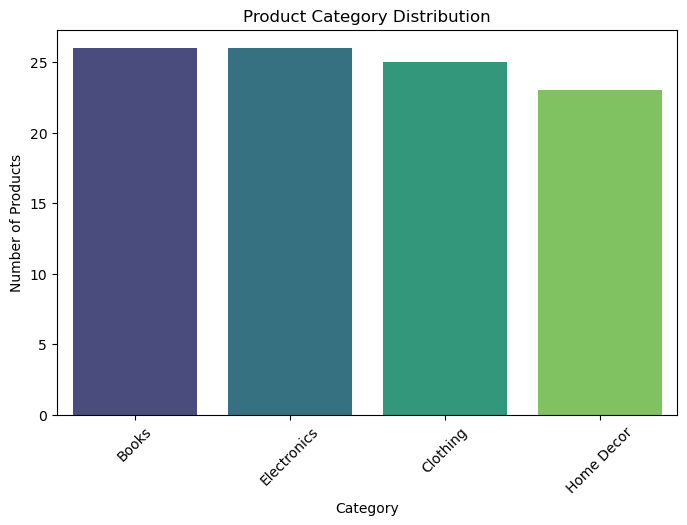

In [39]:
#plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=products, order=products['Category'].value_counts().index, palette='viridis')
plt.title("Product Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

In [41]:
print("\nNumber of unique transactions:", transactions['TransactionID'].nunique())
print("\nTotal revenue:", transactions['TotalValue'].sum())


Number of unique transactions: 1000

Total revenue: 689995.56


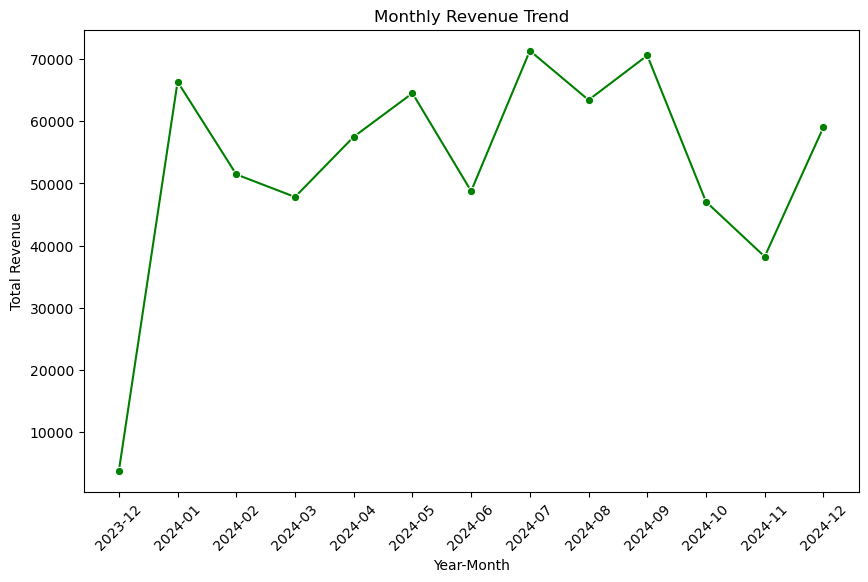

In [45]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

transactions['YearMonth'] = transactions['YearMonth'].astype(str)

monthly_revenue = transactions.groupby('YearMonth')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='TotalValue', marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

C:\Users\Siddhika\AppData\Local\Temp\ipykernel_2436\2494516394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_purchased, x='ProductName', y='Quantity', palette='coolwarm')


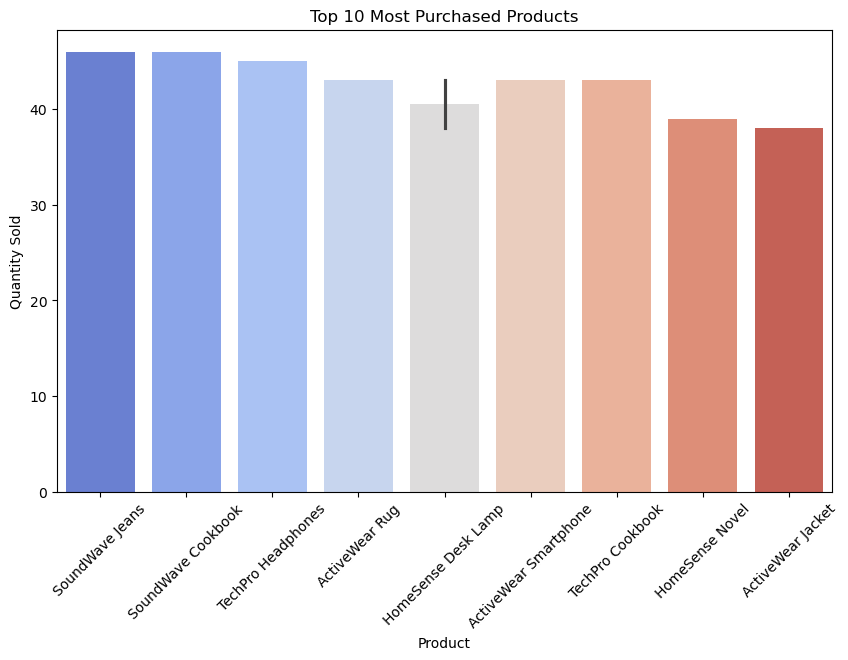

In [47]:
most_purchased = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
most_purchased = most_purchased.reset_index().merge(products, on='ProductID')
plt.figure(figsize=(10, 6))
sns.barplot(data=most_purchased, x='ProductName', y='Quantity', palette='coolwarm')
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


In [49]:
print("\nKey Insights:")
print("1. There are", customers['CustomerID'].nunique(), "unique customers in the dataset.")
print("2. Most customer signups occurred in recent years (as shown in the signup distribution).")
print("3. The company offers", products['ProductID'].nunique(), "unique products across", products['Category'].nunique(), "categories.")
print("4. The highest revenue-generating months are observed in the monthly revenue trend analysis.")
print("5. Top-selling products include:")
print(most_purchased[['ProductName', 'Quantity']])


Key Insights:
1. There are 200 unique customers in the dataset.
2. Most customer signups occurred in recent years (as shown in the signup distribution).
3. The company offers 100 unique products across 4 categories.
4. The highest revenue-generating months are observed in the monthly revenue trend analysis.
5. Top-selling products include:
             ProductName  Quantity
0        SoundWave Jeans        46
1     SoundWave Cookbook        46
2     TechPro Headphones        45
3         ActiveWear Rug        43
4    HomeSense Desk Lamp        43
5  ActiveWear Smartphone        43
6       TechPro Cookbook        43
7        HomeSense Novel        39
8      ActiveWear Jacket        38
9    HomeSense Desk Lamp        38


In [51]:
plt.savefig("monthly_revenue_trend.png")


<Figure size 640x480 with 0 Axes>